YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [21]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = 'YearBuilt'
col_train = train[col]
col_test = test[col]

In [22]:
train[col].dtype

dtype('int64')

In [23]:
col_train.nunique()

112

In [24]:
col_train.isnull().sum()

0

In [25]:
col_train.value_counts(dropna=False)

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

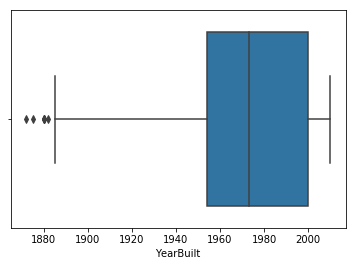

In [26]:
sns.boxplot(col_train)

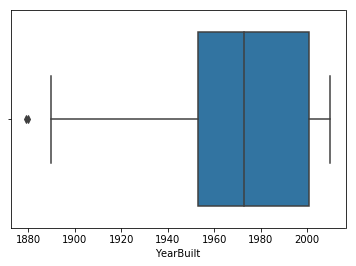

In [27]:
sns.boxplot(col_test)

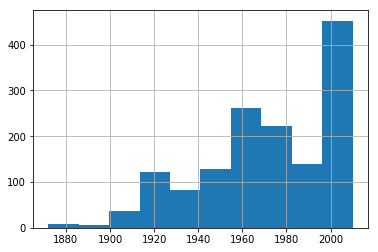

In [28]:
col_train.hist()

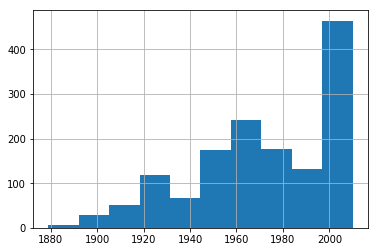

In [29]:
col_test.hist()

### SalePrice according to MSSubClass

In [30]:
cols = ['MSSubClass', 'SalePrice']
aggr = {
    'SalePrice': {
        'avg_price': 'mean'
    }
}
groupby = train[cols].groupby('MSSubClass').mean()
groupby.sort_values('SalePrice')

,SalePrice
MSSubClass,
30,95829.724638
180,102300.000000
45,108591.666667
190,129613.333333
90,133541.076923
160,138647.380952
50,143302.972222
85,147810.000000
40,156125.000000


### Write a transformer to one-hot encode this feature

In [54]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
import category_encoders as ce

class MSSubClassTransformer(TransformerMixin):
    """
    one-hot encoded this feature because it is categorical
    instead of recognize it as an int feature
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        col = 'MSSubClass'
        dummy = pd.get_dummies(X[col], prefix=col)
        drop_col = X.drop(col, axis=1)
        df = pd.concat([dummy, drop_col], axis=1)
        return df
        
# test
pipe = Pipeline([
    ('transformer', MSSubClassTransformer())
])
transformed = pipe.transform(train[cols])
transformed.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,208500
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181500
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,223500
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,140000
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,250000


not using ColumnTransformer from sklearn.compose because it does not return dataframe but ndarray